###Prediksi jumlah pengendara sepeda

Sistem berbagi sepeda adalah generasi baru persewaan sepeda tradisional di mana seluruh proses mulai dari keanggotaan, persewaan, dan pengembalian menjadi otomatis. Melalui sistem ini, pengguna dapat dengan mudah menyewa sepeda dari posisi tertentu dan kembali lagi di posisi lain. Saat ini, ada lebih dari 500 program berbagi sepeda di seluruh dunia yang terdiri dari lebih dari 500 ribu sepeda. Saat ini, ada minat besar dalam sistem ini karena peran penting mereka dalam masalah lalu lintas, lingkungan dan kesehatan. Terlepas dari aplikasi dunia nyata yang menarik dari sistem berbagi sepeda, karakteristik data yang dihasilkan oleh sistem ini membuatnya menarik untuk penelitian. Berlawanan dengan layanan transportasi lain seperti bus atau kereta bawah tanah, durasi perjalanan, posisi keberangkatan dan kedatangan dicatat secara eksplisit dalam sistem ini.

catatan lenght x

##import librarry

In [368]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'axes.facecolor':'#cacccf'})
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [369]:
df = pd.read_csv('hour.csv')
df.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.29,0.81,0.00,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.27,0.80,0.00,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.27,0.80,0.00,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.29,0.75,0.00,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.29,0.75,0.00,0,1,1


In [370]:
dfm = pd.read_csv('day.csv')
df.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.29,0.81,0.00,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.27,0.80,0.00,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.27,0.80,0.00,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.29,0.75,0.00,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.29,0.75,0.00,0,1,1


1. dteday = tanggal pemakaian sepeda
2. season = musim yang terbagi menjadi (1:winter, 2:spring, 3:summer, 4:fall)
3. yr = tahun
4. mnth = bulan
5. hr = jam
6. holiday = hari libur(1) dan bukan hari libur (0)
7. weekday = hari dalam seminggu
8. workingday = hari kerja (1) dan bukan hari kerja (0)
9. weathersit = clear (1), cloudy(2), light rain(3), snow thunderstorm (4)
10. temp = tempratur, dengan nilai (t-tmin)/(tmax-tmin), tmin=-8, t_max=+39.
11. atemp = tempratur feeling, dengan nilai (t-tmin)/(tmax-tmin), tmin=-16, t_max=+50 
12. hum = kelembaban
13. windspeed = kecepatan angin
14. casual = pengguna biasa
15. registred = pengguna terdaftar
16. cnt = jumlah total pengguna

##data cleaning

In [371]:
df.shape

(17379, 17)

In [372]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [373]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [374]:
dfm.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [375]:
df.duplicated().sum()

0

menghapus kolom berikut :
1. kolom dteday dan karena mnth dan weekend sudah cukup untuk mengerti kapan peminjaman
2. instant karena tidak memerlukan penomoran
3. casual dan registred, karena cuman mengambil jumlah total pengguna
4. atemp, karena temp sudah cukup

In [376]:
df=df.drop(['dteday','instant','casual','registered'],1)
dfm=dfm.drop(['dteday','instant','casual','registered'],1)

In [377]:
#ubah nama kolom
dfm.rename(columns={'season' : 'Musim', 'weekday' : 'Hari','mnth' : 'Bulan', 'weathersit' : 'Cuaca','holiday' : 'Hari_Libur','workingday' : 'Hari_Kerja', 'temp' : 'Suhu', 'hum' : 'Kelembaban', 'windspeed' : 'Kecepatan_Angin', 'cnt' : 'Jumlah','atemp' : 'Suhu yang Dirasakan', 'yr' : 'Tahun'  }, inplace=True)
#ubah nama kolom
df.rename(columns={'season' : 'Musim', 'weekday' : 'Hari','mnth' : 'Bulan', 'weathersit' : 'Cuaca','holiday' : 'Hari_Libur','workingday' : 'Hari_Kerja', 'temp' : 'Suhu', 'hum' : 'Kelembaban', 'windspeed' : 'Kecepatan_Angin', 'cnt' : 'Jumlah', 'hr' : 'Jam','atemp' : 'Suhu yang Dirasakan', 'yr' : 'Tahun'  }, inplace=True)

In [378]:
df.head(5)

,Musim,Tahun,Bulan,Jam,Hari_Libur,Hari,Hari_Kerja,Cuaca,Suhu,Suhu yang Dirasakan,Kelembaban,Kecepatan_Angin,Jumlah
0,1,0,1,0,0,6,0,1,0.24,0.29,0.81,0.00,16
1,1,0,1,1,0,6,0,1,0.22,0.27,0.80,0.00,40
2,1,0,1,2,0,6,0,1,0.22,0.27,0.80,0.00,32
3,1,0,1,3,0,6,0,1,0.24,0.29,0.75,0.00,13
4,1,0,1,4,0,6,0,1,0.24,0.29,0.75,0.00,1


In [379]:
dfm.head(5)

,Musim,Tahun,Bulan,Hari_Libur,Hari,Hari_Kerja,Cuaca,Suhu,Suhu yang Dirasakan,Kelembaban,Kecepatan_Angin,Jumlah
0,1,0,1,0,6,0,2,0.34,0.36,0.81,0.16,985
1,1,0,1,0,0,0,2,0.36,0.35,0.70,0.25,801
2,1,0,1,0,1,1,1,0.20,0.19,0.44,0.25,1349
3,1,0,1,0,2,1,1,0.20,0.21,0.59,0.16,1562
4,1,0,1,0,3,1,1,0.23,0.23,0.44,0.19,1600


In [380]:
dfm=dfm.drop(['Hari_Libur'],1)

In [381]:
dfm.head()

,Musim,Tahun,Bulan,Hari,Hari_Kerja,Cuaca,Suhu,Suhu yang Dirasakan,Kelembaban,Kecepatan_Angin,Jumlah
0,1,0,1,6,0,2,0.34,0.36,0.81,0.16,985
1,1,0,1,0,0,2,0.36,0.35,0.70,0.25,801
2,1,0,1,1,1,1,0.20,0.19,0.44,0.25,1349
3,1,0,1,2,1,1,0.20,0.21,0.59,0.16,1562
4,1,0,1,3,1,1,0.23,0.23,0.44,0.19,1600


ubah tipe data dan rename untuk lebih mudah memahami data

In [382]:
df['Musim'] = df['Musim'].map({1:"Musim Dingin",2:"Musim Semi",3:"Musim panas",4:"Musim Gugur"})
df['Hari'] = df['Hari'].map({0:"Sabtu",1:"Minggu",2:"Senin",3:"Selasa",4:"Rabu",5:"Kamis",6:"Jumat"})
df['Bulan'] = df['Bulan'].map({1:"Januari",2:"Februari",3:"Maret",4:"April",5:"Mei",6:"Juni",7:"Juli",8:"Agustus",9:"September",10:"Oktober",11:"November",12:"Desember"})
df['Cuaca'] = df['Cuaca'].map({1:"Cerah",2:"Berawan",3:"Hujan",4:"Salju"})
df['Hari_Libur'] = df['Hari_Libur'].map({1:"Iya",0:"Tidak"})
df['Hari_Kerja'] = df['Hari_Kerja'].map({1:"Iya",0:"Tidak"})

In [383]:
df.head(5)

,Musim,Tahun,Bulan,Jam,Hari_Libur,Hari,Hari_Kerja,Cuaca,Suhu,Suhu yang Dirasakan,Kelembaban,Kecepatan_Angin,Jumlah
0,Musim Dingin,0,Januari,0,Tidak,Jumat,Tidak,Cerah,0.24,0.29,0.81,0.00,16
1,Musim Dingin,0,Januari,1,Tidak,Jumat,Tidak,Cerah,0.22,0.27,0.80,0.00,40
2,Musim Dingin,0,Januari,2,Tidak,Jumat,Tidak,Cerah,0.22,0.27,0.80,0.00,32
3,Musim Dingin,0,Januari,3,Tidak,Jumat,Tidak,Cerah,0.24,0.29,0.75,0.00,13
4,Musim Dingin,0,Januari,4,Tidak,Jumat,Tidak,Cerah,0.24,0.29,0.75,0.00,1


In [384]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Musim                17379 non-null  object 
 1   Tahun                17379 non-null  int64  
 2   Bulan                17379 non-null  object 
 3   Jam                  17379 non-null  int64  
 4   Hari_Libur           17379 non-null  object 
 5   Hari                 17379 non-null  object 
 6   Hari_Kerja           17379 non-null  object 
 7   Cuaca                17379 non-null  object 
 8   Suhu                 17379 non-null  float64
 9   Suhu yang Dirasakan  17379 non-null  float64
 10  Kelembaban           17379 non-null  float64
 11  Kecepatan_Angin      17379 non-null  float64
 12  Jumlah               17379 non-null  int64  
dtypes: float64(4), int64(3), object(6)
memory usage: 1.7+ MB


In [385]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Musim                731 non-null    int64  
 1   Tahun                731 non-null    int64  
 2   Bulan                731 non-null    int64  
 3   Hari                 731 non-null    int64  
 4   Hari_Kerja           731 non-null    int64  
 5   Cuaca                731 non-null    int64  
 6   Suhu                 731 non-null    float64
 7   Suhu yang Dirasakan  731 non-null    float64
 8   Kelembaban           731 non-null    float64
 9   Kecepatan_Angin      731 non-null    float64
 10  Jumlah               731 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 62.9 KB


##Exploratory Data Analysis

In [386]:
!pip uninstall matplotlib

Found existing installation: matplotlib 3.5.3
Uninstalling matplotlib-3.5.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.3-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.5.3


In [387]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.5.3-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.1 which is incompatible.
plotnine 0.8.0 requires pandas>=1.1.0, but you have pandas 1.0.5 which is incompatible.
mizani 0.7.3 requires pandas>=1.1.0, but you have pandas 1.0.5 which is incompatible.


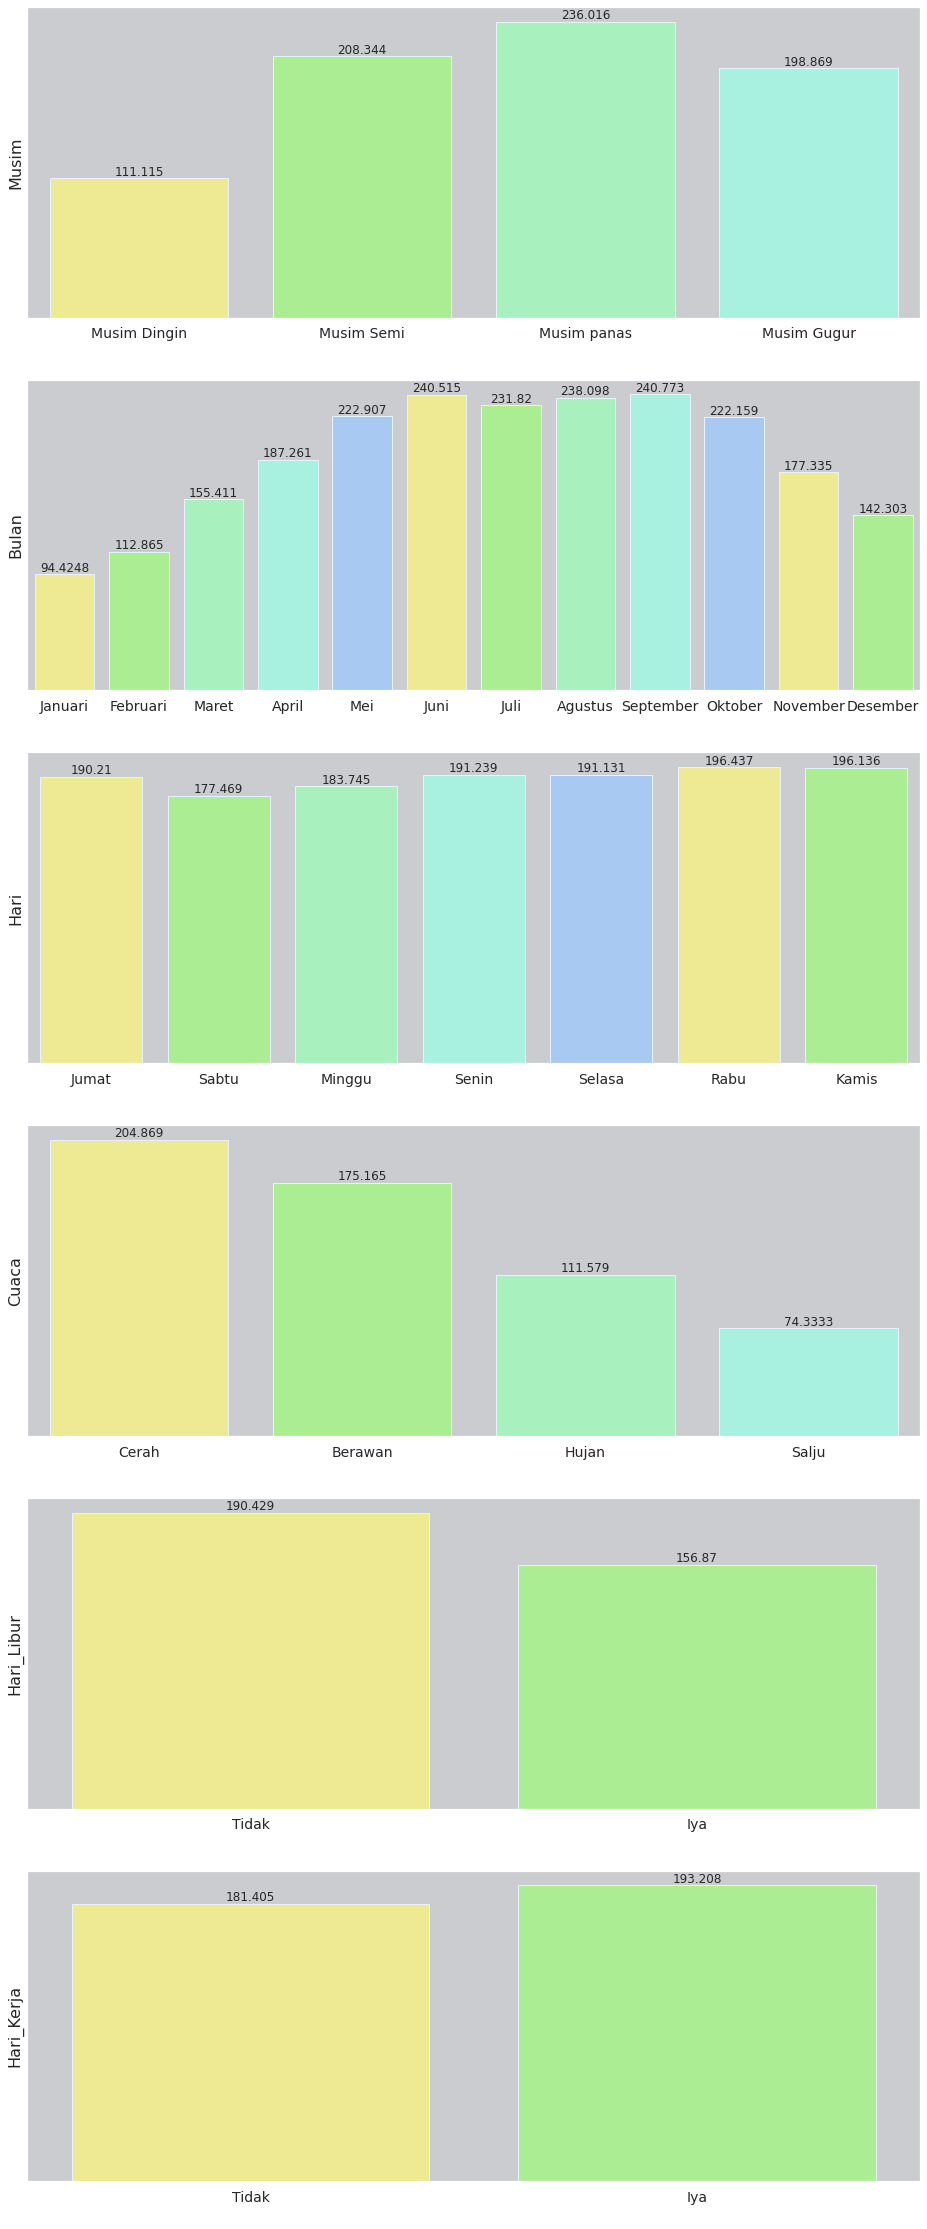

In [388]:

num_cols = list(df.select_dtypes(["int64","float64"]))
cat_cols = list(df.select_dtypes("object"))


cat_col_vis = ['Musim','Bulan','Hari','Cuaca','Hari_Libur','Hari_Kerja']

fig, ax = plt.subplots(ncols=1, nrows=6, figsize=(16, 40))
                
i = 0 

for cols in cat_col_vis:
    
    sns.barplot(x=df[cols], y=df['Jumlah'], fill=True, alpha=1, ci=None, ax=ax[i], palette=('#fcf884', '#a4fc84','#9cfdba',
                                                                                                     '#9cfde7','#9cc8fd'),
                                                                                            edgecolor="#e8f2fd")
                
    ax[i].set_xlabel(' ')
    ax[i].set_xlabel(' ')
    ax[i].set_ylabel(' ')
    ax[i].xaxis.set_tick_params(labelsize=14)
    ax[i].tick_params(left=False, labelleft=False)
    ax[i].set_ylabel(cols, fontsize=16)    
    ax[i].grid(False)
    ax[i].bar_label(ax[i].containers[0], size="12")
    i=i+1
    
      
plt.show()

Dari data diatas dapat disimpulkan :
1. kalau musim dingin memiliki jumlah pengendara paling sedikit dibandingkan musim lainnya.
2. cuaca yang buruk sangat mempengaruhi jumlah pengendara
3. Jumlah pengendara di hari kerja lebih tinggi dibandingkan hari libur

dari visual diatas dapat diketahui bahwa pengendara tahun 2012 lebih banyak dibandingkan tahun 2011

In [389]:
x=df.groupby(["Jam"])["Jumlah"].agg(["sum"])
x = x.sort_values(by="sum",ascending=False)
x

,sum
Jam,
17,336860
18,309772
8,261001
16,227748
19,226789
13,184919
12,184414
15,183149
14,175652


Jam lima sore adalah puncak pemakaian sepeda

<Figure size 1080x288 with 0 Axes>

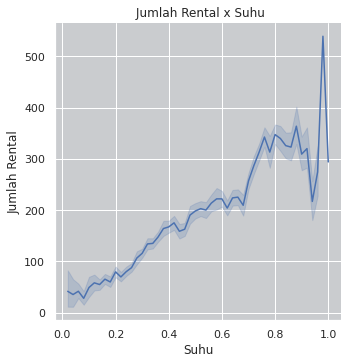

In [390]:
#suhu
plt.figure(figsize=(15,4))
sns.relplot(x='Suhu',y="Jumlah",kind="line",data=df)
plt.title(" Jumlah Rental x Suhu",) 
plt.xlabel("Suhu")
plt.ylabel("Jumlah Rental")
plt.show()

Hasil diatas mengatakan kenaikan suhu mengakibatkan kenaikan pengendara sepeda

<Figure size 1080x288 with 0 Axes>

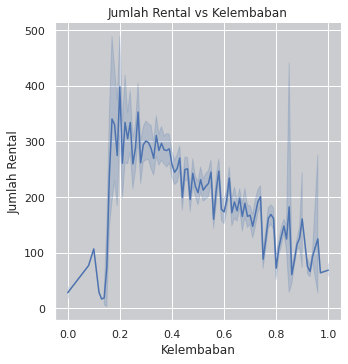

In [391]:
#Kelembaban Udara
plt.figure(figsize=(15,4))
sns.relplot(x='Kelembaban',y="Jumlah",kind="line",data=df)
plt.title("Jumlah Rental vs Kelembaban") 
plt.xlabel("Kelembaban")
plt.ylabel("Jumlah Rental")
plt.show()

Hal ini berarti jika kelembaban udara meningkat maka pengendara sepeda akan menurun

<Figure size 1080x288 with 0 Axes>

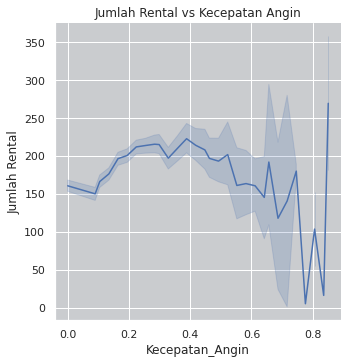

In [392]:
#Kecepatan Angin
plt.figure(figsize=(15,4))
sns.relplot(x='Kecepatan_Angin',y="Jumlah",kind="line",data=df)
plt.title("Jumlah Rental vs Kecepatan Angin") 
plt.xlabel("Kecepatan_Angin")
plt.ylabel("Jumlah Rental")
plt.show()

tidak ada hubungan linear yang dapat disimpulkan dari visual diatas

##Check Correlation

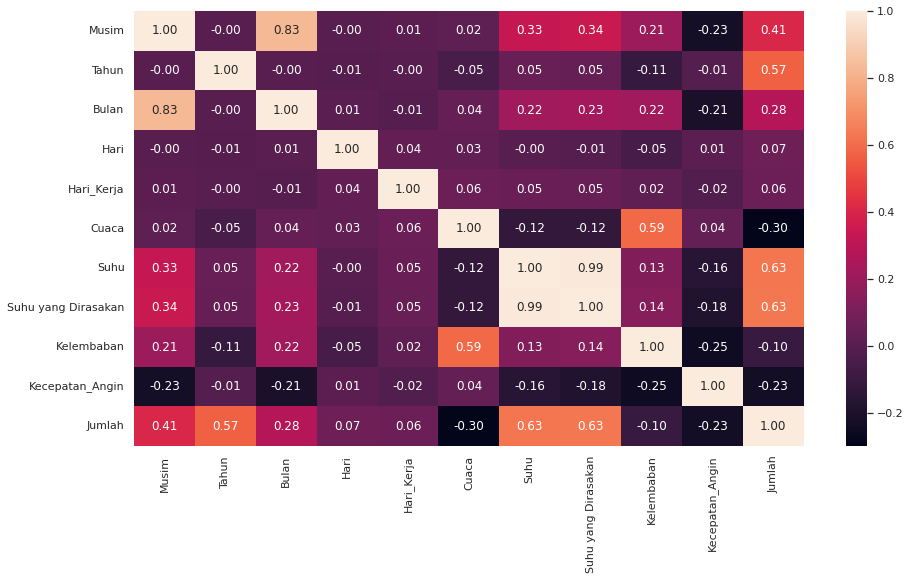

In [393]:
bike_train = dfm
corr = bike_train.corr()

plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

In [394]:
dfm=dfm.drop(['Musim','Suhu yang Dirasakan'],1)

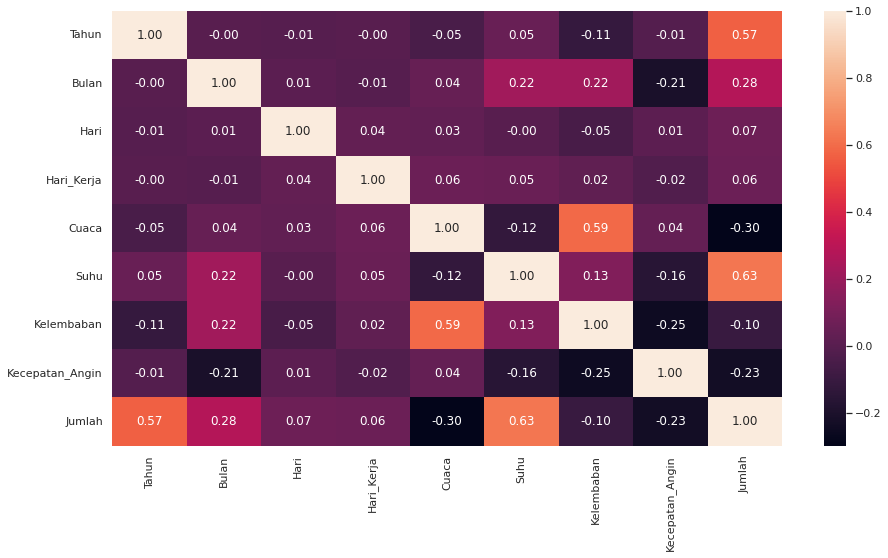

In [395]:
bike_train = dfm
corr = bike_train.corr()

plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

##Split data dan shift satu hari

In [396]:
Y = dfm.pop('Jumlah')
days = 1

In [397]:
Y.tail(5)

726    2114
727    3095
728    1341
729    1796
730    2729
Name: Jumlah, dtype: int64

In [398]:
X = dfm
X.tail(5)

,Tahun,Bulan,Hari,Hari_Kerja,Cuaca,Suhu,Kelembaban,Kecepatan_Angin
726,1,12,4,1,2,0.25,0.65,0.35
727,1,12,5,1,2,0.25,0.59,0.16
728,1,12,6,0,2,0.25,0.75,0.12
729,1,12,0,0,1,0.26,0.48,0.35
730,1,12,1,1,2,0.22,0.58,0.15


In [399]:
Y = Y.shift(-1*days)

In [400]:
X = X[:len(dfm) - days]
Y = Y[:-days] 


X.shape, Y.shape

((730, 8), (730,))

In [401]:
X.tail(5)

,Tahun,Bulan,Hari,Hari_Kerja,Cuaca,Suhu,Kelembaban,Kecepatan_Angin
725,1,12,3,1,3,0.24,0.82,0.32
726,1,12,4,1,2,0.25,0.65,0.35
727,1,12,5,1,2,0.25,0.59,0.16
728,1,12,6,0,2,0.25,0.75,0.12
729,1,12,0,0,1,0.26,0.48,0.35


In [402]:
Y.tail(5)

725   2114.00
726   3095.00
727   1341.00
728   1796.00
729   2729.00
Name: Jumlah, dtype: float64

In [403]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from sklearn.ensemble import  RandomForestRegressor

In [404]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [405]:
prediction_x_array = X
prediction_x_array = prediction_x_array[-days:]
print(type(prediction_x_array))

<class 'pandas.core.frame.DataFrame'>


##Check Outlier

In [406]:
feat_xtrain = list(X_train)

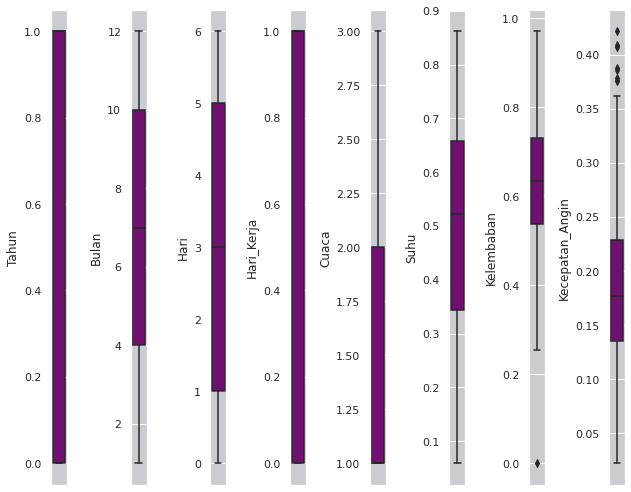

In [407]:
plt.figure(figsize=(20, 7))
for i in range(0, len(feat_xtrain)):
    plt.subplot(1, 18, i+1)
    sns.boxplot(y=X_train[feat_xtrain[i]],color='purple',orient='v')
    plt.tight_layout()

In [408]:
X_train['Kecepatan_Angin'] = np.sqrt(X_train['Kecepatan_Angin'])

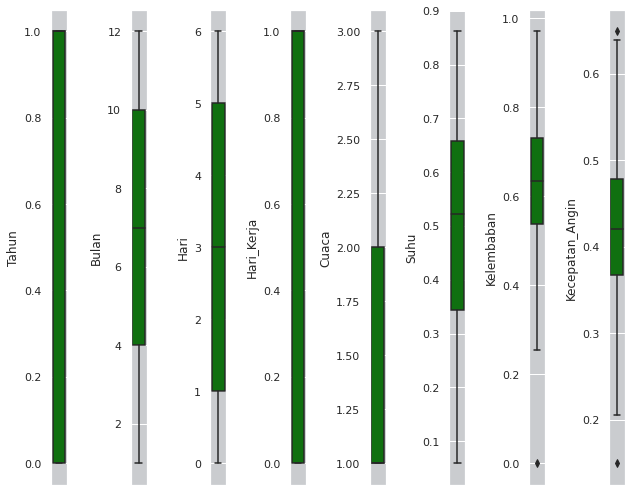

In [409]:
plt.figure(figsize=(20, 7))
for i in range(0, len(feat_xtrain)):
    plt.subplot(1, 18, i+1)
    sns.boxplot(y=X_train[feat_xtrain[i]],color='green',orient='v')
    plt.tight_layout()

In [410]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##Random Forest Regressor

In [411]:
model_rf = RandomForestRegressor(random_state=42)

In [412]:
model_rf.fit(X_train, Y_train)
pred_rf = model_rf.predict(X_test)

In [413]:
#Data Test
print('Testing RMSE: ', np.sqrt(mean_squared_error(Y_test, pred_rf)))
print('Testing MAE: ',  mean_absolute_error(Y_test, pred_rf))
print('Testing R2: ',  r2_score(Y_test, pred_rf))

Testing RMSE:  1005.912992241059
Testing MAE:  738.706894977169
Testing R2:  0.7358824297852926


In [414]:
pred_rf_trn = model_rf.predict(X_train)

In [415]:
#Data train
print('Training RMSE: ', np.sqrt(mean_squared_error(Y_train, pred_rf_trn)))
print('Training MAE: ',  mean_absolute_error(Y_train, pred_rf_trn))
print('Training R2: ',  r2_score(Y_train, pred_rf_trn))

Training RMSE:  383.5879124371701
Training MAE:  271.6052054794521
Training R2:  0.9600204026303186


##HYperparameter 

In [416]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# jumlah pohon random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 1000, num = 1000)]
# jumlah feature
max_features = ['auto', 'sqrt']
# jumlah maksimal dept
max_depth = [int(x) for x in np.linspace(1, 600, num = 600)]
# jumlah minimal split
min_samples_split = [2, 10]

# random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

pprint(random_grid)

{'max_depth': [1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,
               49,
               50,
               51,
               52,
               53,
  

In [417]:
#3 vold validation
# gunakan semua kombinasi untuk cari yang terbaik
rf_random = RandomizedSearchCV(estimator = model_rf, param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1, scoring='neg_mean_squared_error')
# fit model
rf_random.fit(X_train, Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   36.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   58.9s finished


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [2, 10],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                        

In [418]:
#Perubahan rmse untuk tiap parameter
cvres2 = rf_random.cv_results_
for mean_score, params in zip(cvres2["mean_test_score"], cvres2["params"]):
    print(np.sqrt(-mean_score), params)

1025.984715574915 {'n_estimators': 111, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 555}
1000.5789755480278 {'n_estimators': 85, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 558}
1004.0659639174336 {'n_estimators': 331, 'min_samples_split': 2, 'max_features': 'auto', 'max_depth': 590}
1005.9182058364947 {'n_estimators': 744, 'min_samples_split': 2, 'max_features': 'auto', 'max_depth': 424}
1012.3051967798244 {'n_estimators': 269, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': 28}
1003.9042900144706 {'n_estimators': 181, 'min_samples_split': 2, 'max_features': 'auto', 'max_depth': 184}
1014.994776352377 {'n_estimators': 490, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': 559}
1101.030174364804 {'n_estimators': 7, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': 393}
1023.3983697120176 {'n_estimators': 275, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 501}
1011.6907119902771 {'n_estimators': 75, '

In [419]:
# best random model 
rf_random.best_estimator_

RandomForestRegressor(max_depth=558, min_samples_split=10, n_estimators=85,
                      random_state=42)

In [420]:
# best combination of parameters of random search
rf_random.best_params_

{'n_estimators': 85,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 558}

Data train

In [421]:
# performa mape
random_best_train= rf_random.best_estimator_.predict(X_train)
errors = abs(random_best_train - Y_train)
# hitung nilai mape
mape = np.mean(100 * (errors / Y_train))
# tampilkan akurasi
accuracy = 100 - mape    
#print hasil
print('The best model from the randomized search has an accuracy of', round(accuracy, 2),'%')

The best model from the randomized search has an accuracy of 83.91 %


In [422]:
#Data train
print('Training RMSE: ', np.sqrt(mean_squared_error(Y_train, random_best_train)))
print('Training MAE: ',  mean_absolute_error(Y_train, random_best_train))
print('Training R2: ',  r2_score(Y_train, random_best_train))

Training RMSE:  616.9223027265632
Training MAE:  440.08578585980854
Training R2:  0.8965883348123671


data test

In [423]:
# Performa mape
random_best_test= rf_random.best_estimator_.predict(X_test)
errors = abs(random_best_test - Y_test)
# Hitung nilai mape
mape = np.mean(100 * (errors / Y_test))
# hitung dan tampilkan akurasi
accuracy = 100 - mape    
#print result
print('The best model from the randomized search has an accuracy of', round(accuracy, 2),'%')

The best model from the randomized search has an accuracy of -45.95 %


In [424]:
print('Testing RMSE: ', np.sqrt(mean_squared_error(Y_test, random_best_test)))
print('Testing MAE: ',  mean_absolute_error(Y_test, random_best_test))
print('Testing R2: ',  r2_score(Y_test, random_best_test))

Testing RMSE:  989.9369691017802
Testing MAE:  717.9719490441045
Testing R2:  0.7442052982134435


In [425]:
random_best_test= rf_random.best_estimator_.predict(X_test)

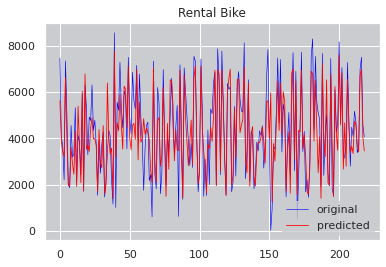

In [426]:
x_ax = range(len(Y_test))
plt.plot(x_ax, Y_test, lw=0.6, color="blue", label="original")
plt.plot(x_ax, random_best_test, lw=0.8, color="red", label="predicted")
plt.title("Rental Bike")
plt.legend()
plt.show()

##Lazy predict

In [427]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [428]:
from lazypredict.Supervised import LazyRegressor

In [429]:
reg = LazyRegressor(ignore_warnings=False, custom_metric=None)
models, prediction = reg.fit(X_train,X_test, Y_train, Y_test)
print(models)

100%|██████████| 42/42 [00:03<00:00, 12.16it/s]

                               Adjusted R-Squared  R-Squared    RMSE  \
Model                                                                  
ExtraTreesRegressor                          0.75       0.76  966.72   
HistGradientBoostingRegressor                0.74       0.75  970.92   
LGBMRegressor                                0.74       0.75  986.94   
RandomForestRegressor                        0.73       0.74 1004.86   
GradientBoostingRegressor                    0.71       0.72 1036.63   
Lars                                         0.68       0.70 1078.52   
TransformedTargetRegressor                   0.68       0.70 1078.52   
LinearRegression                             0.68       0.70 1078.52   
Lasso                                        0.68       0.70 1078.86   
Ridge                                        0.68       0.70 1079.00   
OrthogonalMatchingPursuitCV                  0.68       0.70 1080.30   
BayesianRidge                                0.68       0.70 108

##Extra Trees for Regression

In [430]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [431]:
etr = ExtraTreesRegressor()
print(etr)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators='warn',
                    n_jobs=None, oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

ExtraTreesRegressor()


ExtraTreesRegressor(n_estimators='warn')

In [432]:
etr.fit(X_train,Y_train)

score = etr.score(X_train, Y_train)
print("Score: ", score)

Score:  0.9999999950841955


In [433]:
cv_scores = cross_val_score(etr, X_train,Y_train,cv=10)
print("Mean cross-validataion score: %.2f" % cv_scores.mean())

Mean cross-validataion score: 0.72


Predicting and accuracy check

In [434]:
ypred = etr.predict(X_test)

mse = mean_squared_error(Y_test, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % mse**(0.5))

MSE: 919394.13
RMSE: 958.85


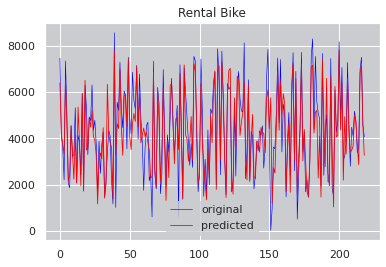

In [435]:
x_ax = range(len(Y_test))
plt.plot(x_ax, Y_test, lw=0.6, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.title("Rental Bike")
plt.legend()
plt.show()

##XGB Regressor

In [436]:
from xgboost import XGBRegressor
xgb=XGBRegressor(random_state=42)

xgb.fit(X_train,Y_train)

print("Score the X-train with Y-train is : ", xgb.score(X_train,Y_train))
print("Score the X-test  with Y-test  is : ", xgb.score(X_test,Y_test))

Score the X-train with Y-train is :  0.9998452428646284
Score the X-test  with Y-test  is :  0.6574449205129977


Hyperparameter tuning

In [437]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42)

In [438]:
from sklearn.model_selection import GridSearchCV
param_grid = {'learning_rate':[0.5,0.10,0.01,0.1],
             'n_estimators':[25,50,75,100,125],
              'max_depth':[5,7,9,10],
              'subsample':[1,2],
              'min_samples_split':[1,2,3],
              'min_samples_leaf':[1,1.5,2],
              'max_depth':[5,7,9,10]
              
             }

g_search = GridSearchCV(estimator = gbr, param_grid = param_grid,cv = 3, n_jobs = 1,verbose = True, return_train_score=True)
g_search.fit(X_train, Y_train);

print(g_search.best_params_)
print(g_search.score(X_test, Y_test))

Fitting 3 folds for each of 1440 candidates, totalling 4320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50, 'subsample': 1}
0.6971589474118323


[Parallel(n_jobs=1)]: Done 4320 out of 4320 | elapsed:  1.9min finished


In [439]:
y_pred_gbr = g_search.predict(X_test)

<AxesSubplot:xlabel='Jumlah'>

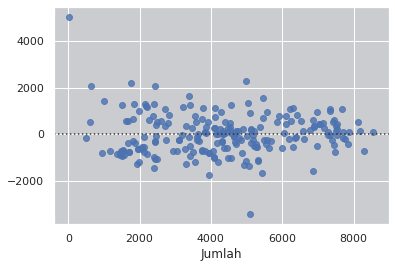

In [440]:
sns.residplot(Y_test,y_pred_gbr)

In [441]:
print("R2 Score Gradient Boost Regressor" ,r2_score(Y_test,y_pred_gbr))

R2 Score Gradient Boost Regressor 0.6971589474118323


In [442]:
print("MSE: " ,mean_squared_error(np.log(Y_test),np.log(y_pred_gbr)))

MSE:  0.25115004590004814


##Deploy

Karena hasil dari gradient boost regressor yang terbaik maka saya akan gunakan itu untuk modeling

In [443]:
from joblib import dump,load
dump(g_search, 'Bike_count_prediction.joblib')

['Bike_count_prediction.joblib']